### K means Algorithm - Practice Implementation

    The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.
    
    This notebook will be explorating an implementation of the KMeans algorithm. In particular, the algorithm
    will be implemented on the Iris dataset.

1. Import Libraries
    * Numpy, Pandas
    * Matplotlib, Seaborn
    * KMeans Algorithm
   
   
2. Import Dataset
    * Iris data from sklearn.datasets
    * Structure it into DataFrame
    

3. KMeans
    * Finding the number of clusters
        * 2D
        * 3D
        * Elbow Methods for higher dimensions

#### Import Libraries

In [2]:
import numpy as np # for linear algebra
import pandas as pd # for data manipulation
import seaborn as sns # for visualization
import matplotlib.pyplot as plt # for visualization

In [46]:
sns.set_style("darkgrid") # visualization styles

# Embed visualizations in Notebooks
%matplotlib inline

In [10]:
from sklearn.cluster import KMeans # KMeans clustering algorithm
from sklearn.datasets import load_iris # Loading the iris dataset

#### Import Dataset

In [7]:
features, target = load_iris(return_X_y=True)

iris_data = pd.DataFrame(data=features)
iris_data.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

iris_data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### KMeans

    A common problem with the KMeans is picking the number of clusters for our dataset. As I will demonstrate
    below, it's easier to pick "n_clusters" for data represented in 2D or 3D. Once we go past these dimensions,
    visualizing data becomes complex, hence we have to find another way of determining the "n".
    
    Illustration
    
    # 2D Data

`# Visualize "Sepal Length" vs "Sepal Width"`

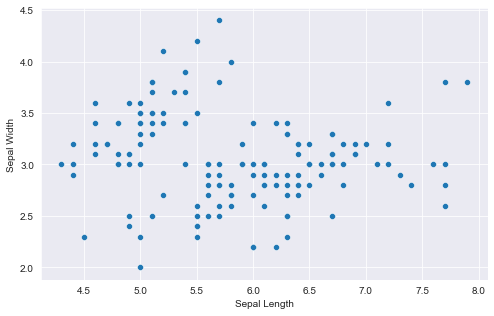

In [27]:
# Figure Size
fig = plt.figure(figsize=(8, 5))

# Scatterplot
ax = sns.scatterplot(data=iris_data, x='Sepal Length', y='Sepal Width')

    Observation:
    
    From the scatterplot above, we can observe 2 major clusters. To draw deep into the data, we can observe
    3 clusters.

`# Visualize "Sepal Length" vs "Sepal Width" vs "Petal Length"`

In [44]:
from mpl_toolkits.mplot3d import Axes3D

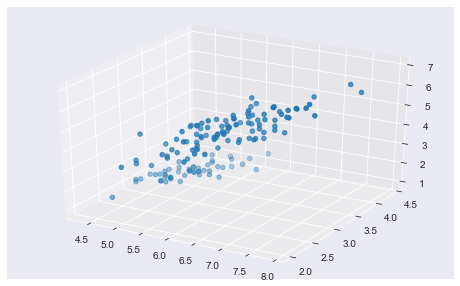

In [47]:
# Figure Size
fig = plt.figure(figsize=(8, 5))

# Subplots
ax = plt.subplot(111, projection='3d')

# Data inputs
x = iris_data['Sepal Length']
y = iris_data['Sepal Width']
z = iris_data['Petal Length']

# 3D Scatterplot
ax.scatter(x, y, z)

    Note:
    
    Once we move from 3D into higher dimenstions, it becomes difficult to visualize the data and determine the
    number of clusters. Hence, we need an efficient and effective methods.
    
    In the next few cell, I will demonstrate such a method.

`Elbow Method - Dimensions above 3D`

    At it's basic level, the "Elbow Method" involves visualizing a lineplot of the Sum-of-Squared-Distances
    against Number of clusters.
    
    Steps:
        * Define a range of possible number of clusters
        * Iterative fit a KMeans model with each cluster number
        * Compute the inertias for each cluster numbers and save those in an array
        * Visualize Inertias against Number of Clusters

In [42]:
# Sum of Squared Distances
sum_squared_distances = []

# List of number of clusters
num_clusters = range(2, 20, 2)

# Fit KMeans model per cluster number
for num in num_clusters:
    kmeans = KMeans(n_clusters=num) # Instantiate Model
    kmeans.fit_predict(iris_data.values) # Fit data and predict
    inertias = kmeans.inertia_ # SSD
    
    # Append SSD
    sum_squared_distances.append(inertias)

Text(0.5, 1.0, 'SSD vs Number of Clusters')

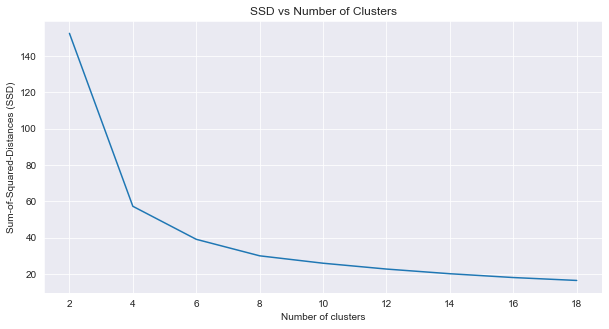

In [48]:
# Figure Size
fig = plt.figure(figsize=(10, 5))

# Line-plot: SSD vs Number of Clusters
ax = sns.lineplot(x=num_clusters, y=sum_squared_distances, markers=True)

# Attributes
plt.ylabel("Sum-of-Squared-Distances (SSD)")
plt.xlabel("Number of clusters")
plt.title("SSD vs Number of Clusters")

    Note:
    
    The lineplot of SSD vs Number of Clusters, above, is a graph that can be used in a technique called 
    Elbow Method to help us determine the number of clusters to use in our KMeans model.
    
    The idea of it is to pick a number on the x-axis immediately before or right at the point where the curve
    makes a sharp turn.
    
    Here, our optimal number is either 3 or 4 number of clusters.